## 导入数据分析包

In [12]:
!python -m pip install --upgrade pip


  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.


In [13]:
!pip install tushare

DEPRECATION: pandas 0.23.4 has a non-standard dependency specifier pytz>=2011k. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pandas or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [15]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 任务1：收益率分析

### 1. 读取股票数据（用tushare获取某股票数据，时间周期自定）

In [26]:
ts.set_token('b425510f91120626ceacdcd9a36087804c9484b2555dd79beab964b2')
pro=ts.pro_api()
ticker='000002'
Vanke=ts.get_k_data(ticker,'2022-10-01','2023-03-28')
Vanke.set_index('date',inplace=True)
Vanke.index=pd.to_datetime(Vanke.index)
Vanke.head(3)

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,close,high,low,volume,code
date,,,,,,
2022-10-10,17.125,17.085,17.745,16.945,948040.0,000002
2022-10-11,17.085,16.305,17.095,16.065,887300.0,000002
2022-10-12,16.305,16.505,16.775,16.135,579587.0,000002


### 2. 读取股票的收盘价

In [28]:
close=Vanke.close
close.head(3)

date
2022-10-10    17.085
2022-10-11    16.305
2022-10-12    16.505
Name: close, dtype: float64

### 3. 计算股票一期收益率，并清除序列空值

In [34]:
lagclose=close.shift(1).head(3)
lagclose.name="lagclose"
dfclose=pd.DataFrame(close)
dflagclose=pd.DataFrame(lagclose)
calclose=pd.merge(dfclose,dflagclose,on='date',how='inner')
calclose.head(3)
simpleret=(close/lagclose)-1
simpleret.head(3)

date
2022-10-10         NaN
2022-10-11   -0.045654
2022-10-12    0.012266
dtype: float64

### 4. 将一期收益率、收盘价和滞后期收盘价数据合并

In [36]:
calclose['simpleret2']=simpleret
calclose.head(3)

,close,lagclose,simpleret2
date,,,
2022-10-10,17.085,NaN,NaN
2022-10-11,16.305,17.085,-0.045654
2022-10-12,16.505,16.305,0.012266


### 5. 绘制股票收益率曲线图

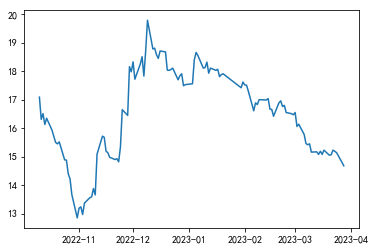

In [39]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.plot(close)

# 任务2：股票风险度量

### 方法1：方差法


In [41]:
simpleret.std()

0.04095580758748185

### 方法2：下行风险法

In [44]:
average=simpleret.mean()
average

-0.016693953254453997

In [49]:
lowerave=simpleret[simpleret<average]
lowerave.head(3)
deviation=(sum((lowerave-average)**2)/len(simpleret))**0.5
deviation

0.0026888804996007005